In [5]:
# Define image size and dataset directory
IMG_SIZE = 64
DATA_DIR = 'data/asl_alphabet_train/asl_alphabet_train'


In [21]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [12]:
model = Sequential()

In [13]:
# Get class labels
classes = os.listdir(DATA_DIR)
num_classes = len(classes)  # Set the number of classes

print("Classes found:", classes)
print("Total classes:", num_classes)


Classes found: ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Total classes: 29


In [14]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

In [18]:



# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 29)                  │           3,741 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,522 (2.65 MB)

 Trainable params: 694,522 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Load the preprocessed data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')


In [23]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 115s 50ms/step - accuracy: 0.0705 - loss: 3.1700 - val_accuracy: 0.3893 - val_loss: 1.6449
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 98s 45ms/step - accuracy: 0.4242 - loss: 1.5200 - val_accuracy: 0.7232 - val_loss: 0.7037
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 94s 43ms/step - accuracy: 0.6563 - loss: 0.8433 - val_accuracy: 0.8166 - val_loss: 0.4537
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 95s 44ms/step - accuracy: 0.7495 - loss: 0.6082 - val_accuracy: 0.8924 - val_loss: 0.2813
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 95s 44ms/step - accuracy: 0.8361 - loss: 0.4263 - val_accuracy: 0.9347 - val_loss: 0.1771
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 95s 44ms/step - accuracy: 0.8854 - loss: 0.3109 - val_accuracy: 0.9511 - val_loss: 0.1182
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 103s 47ms/step - accuracy: 0.9102 - loss: 0.2455 - val_accuracy: 0.9641 - val_loss: 0.0862
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 105s 48ms/step - accuracy: 0.926

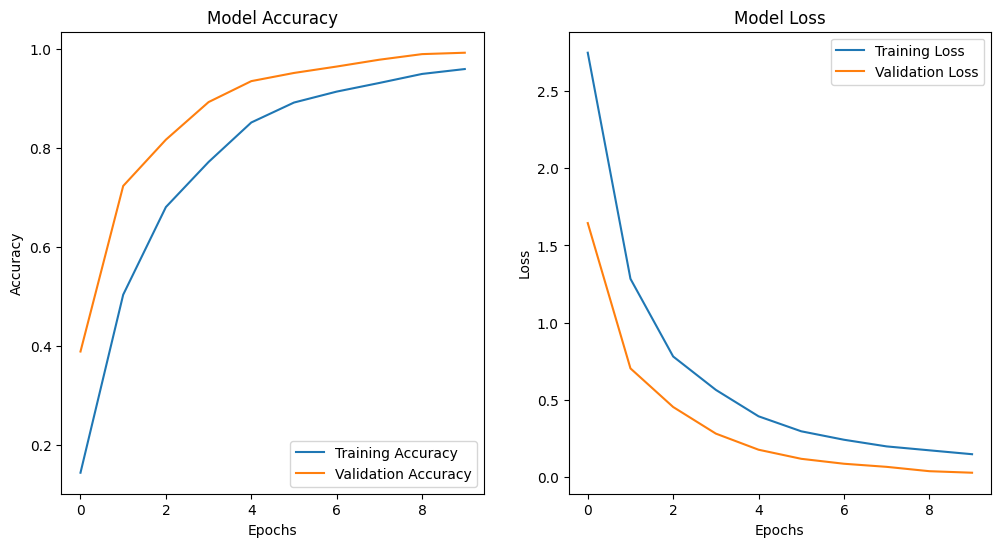

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [25]:
# Save the model
model.save('asl_sign_language_model.h5')
